In [2]:
from google.cloud import bigquery


client = bigquery.Client.from_service_account_json("./nyc-trips-taxi-fa5283227fad.json")


In [3]:
def run_query(query):
    query_job = client.query(query)
    return query_job.result().to_dataframe()

In [3]:
query = """SELECT * FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_*` LIMIT 10"""

df = run_query(query)
df

/Users/amirrezasokhankhosh/mambaforge/envs/data-science/lib/python3.11/site-packages/google/cloud/bigquery/table.py:1994: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,data_file_year,data_file_month
0,2,2019-01-10 18:52:47+00:00,2019-01-10 18:52:58+00:00,1,0E-9,1.0,N,2,0E-9,0E-9,0E-9,0E-9,0E-9,0E-9,0E-9,193,193,2019,1
1,2,2019-01-27 02:53:02+00:00,2019-01-27 03:09:06+00:00,2,3.550000000,1.0,N,2,0E-9,0E-9,0E-9,0E-9,0E-9,0E-9,0E-9,229,202,2019,1
2,2,2019-01-07 22:00:45+00:00,2019-01-07 22:01:05+00:00,1,0E-9,1.0,N,1,0E-9,0E-9,0E-9,0E-9,0E-9,0E-9,0E-9,193,193,2019,1
3,1,2019-01-23 10:07:53+00:00,2019-01-23 10:14:04+00:00,1,0E-9,1.0,N,3,0E-9,0E-9,0E-9,0E-9,0E-9,0E-9,0E-9,145,145,2019,1
4,1,2019-01-18 14:07:13+00:00,2019-01-18 14:07:13+00:00,1,0E-9,5.0,Y,2,0E-9,0E-9,0E-9,0E-9,0E-9,0E-9,0E-9,68,264,2019,1
5,2,2019-01-11 20:45:45+00:00,2019-01-11 20:46:26+00:00,1,0E-9,1.0,N,1,0E-9,0E-9,0E-9,0E-9,0E-9,0E-9,0E-9,193,193,2019,1
6,2,2019-01-12 02:22:33+00:00,2019-01-12 02:23:22+00:00,1,0E-9,1.0,N,1,0E-9,0E-9,0E-9,0E-9,0E-9,0E-9,0E-9,193,193,2019,1
7,2,2019-01-17 01:01:35+00:00,2019-01-17 01:01:40+00:00,1,0E-9,1.0,N,2,0E-9,0E-9,0E-9,0E-9,0E-9,0E-9,0E-9,264,193,2019,1
8,1,2019-01-17 16:52:56+00:00,2019-01-17 16:52:56+00:00,0,0E-9,5.0,N,2,0E-9,0E-9,0E-9,0E-9,0E-9,0E-9,0E-9,237,264,2019,1
9,2,2019-01-30 02:11:46+00:00,2019-01-30 02:11:46+00:00,1,0E-9,1.0,N,2,0E-9,0E-9,0E-9,0E-9,0E-9,0E-9,0E-9,264,193,2019,1


In [6]:
# Any null values?

query = """SELECT COUNT(*) FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_*` WHERE passenger_count IS NULL"""
df = run_query(query)
df

/Users/amirrezasokhankhosh/mambaforge/envs/data-science/lib/python3.11/site-packages/google/cloud/bigquery/table.py:1994: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,f0_
0,4033329


In [ ]:
# Meaningful rows?

query = """SELECT COUNT(*) FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_*` WHERE
extract(YEAR FROM pickup_datetime) < 2023 AND
passenger_count IS NOT NULL AND
TIMESTAMP_DIFF(dropoff_datetime, pickup_datetime, MINUTE) > 0
"""
df = run_query(query)
df

/Users/amirrezasokhankhosh/mambaforge/envs/data-science/lib/python3.11/site-packages/google/cloud/bigquery/table.py:1994: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,f0_
0,1549043739


In [3]:
query = """SELECT AVG(total_amount) AS avg_total_amount, pickup_location_id as LocationID FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_*` WHERE
extract(YEAR FROM pickup_datetime) < 2023 AND
passenger_count IS NOT NULL AND
TIMESTAMP_DIFF(dropoff_datetime, pickup_datetime, MINUTE) > 0 AND
total_amount > 0.1
GROUP BY pickup_location_id
ORDER BY pickup_location_id;"""

avg_total_amount_df = run_query(query)

/Users/amirrezasokhankhosh/mambaforge/envs/data-science/lib/python3.11/site-packages/google/cloud/bigquery/table.py:1994: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [4]:
avg_total_amount_df.to_csv("./avg_total_amount.csv", index=False)

In [5]:
query = """SELECT AVG(tip_amount) AS avg_tip_amount, pickup_location_id as LocationID FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_*` WHERE
extract(YEAR FROM pickup_datetime) < 2023 AND
passenger_count IS NOT NULL AND
TIMESTAMP_DIFF(dropoff_datetime, pickup_datetime, MINUTE) > 0 AND
tip_amount > 0.1
GROUP BY pickup_location_id
ORDER BY pickup_location_id;"""

avg_tip_amount_df = run_query(query)

/Users/amirrezasokhankhosh/mambaforge/envs/data-science/lib/python3.11/site-packages/google/cloud/bigquery/table.py:1994: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [6]:
avg_tip_amount_df.to_csv("./avg_tip_amount.csv", index=False)

In [30]:
import geopandas as gpd

fp = "./zones/taxi_zones.shp"
zones = gpd.read_file(fp)

In [31]:
import pandas as pd

avg_total_amount_df['avg_total_amount'] = pd.to_numeric(avg_total_amount_df['avg_total_amount'], errors='coerce')
avg_total_amount_df['LocationID'] = pd.to_numeric(avg_total_amount_df['LocationID'], errors='coerce')

avg_tip_amount_df['avg_tip_amount'] = pd.to_numeric(avg_tip_amount_df['avg_tip_amount'], errors='coerce')
avg_tip_amount_df['LocationID'] = pd.to_numeric(avg_tip_amount_df['LocationID'], errors='coerce')

In [32]:
zones = zones.merge(avg_total_amount_df, on="LocationID", how="left")
zones = zones.merge(avg_tip_amount_df, on="LocationID", how="left")

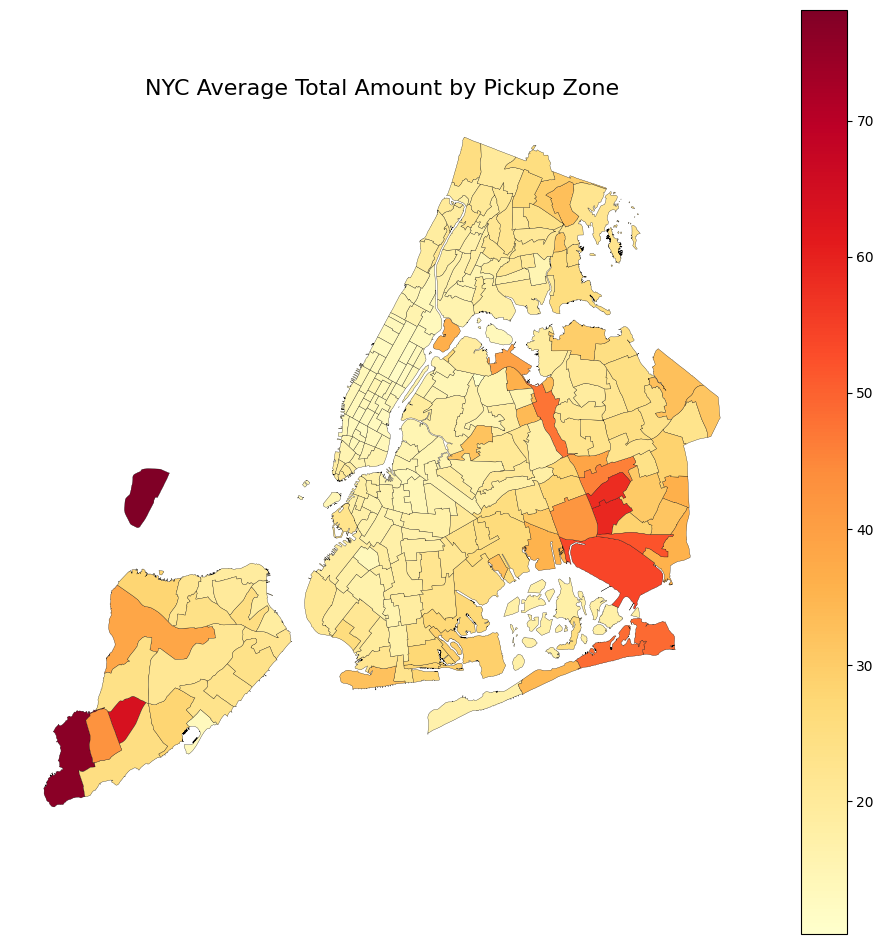

In [33]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(12, 12))

zones.plot(
    column="avg_total_amount",      # color by avg tip
    cmap="YlOrRd",                  # yellow → red gradient
    linewidth=0.2,
    edgecolor="black",
    legend=True,
    ax=ax
)

ax.set_title("NYC Average Total Amount by Pickup Zone", fontsize=16)
ax.axis("off")
plt.show()


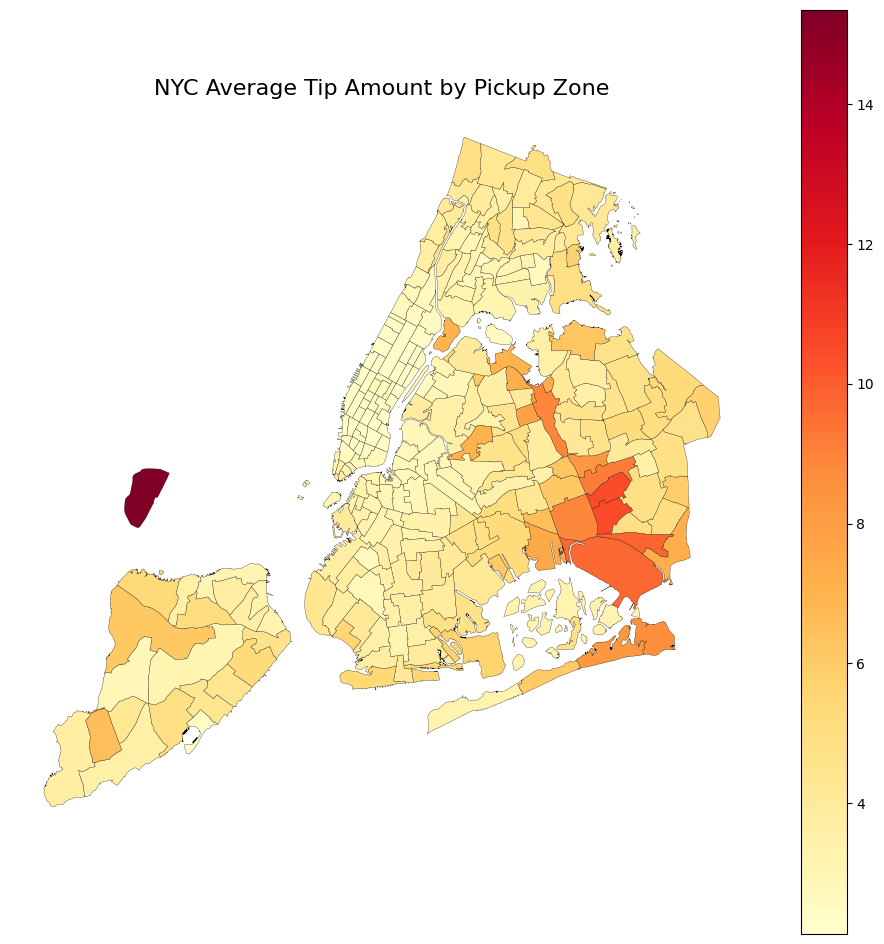

In [34]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(12, 12))

zones.plot(
    column="avg_tip_amount",      # color by avg tip
    cmap="YlOrRd",                  # yellow → red gradient
    linewidth=0.2,
    edgecolor="black",
    legend=True,
    ax=ax
)

ax.set_title("NYC Average Tip Amount by Pickup Zone", fontsize=16)
ax.axis("off")
plt.show()


In [22]:
query = """SELECT 
  COUNT(*) AS trips,
  ROUND((
    EXTRACT(HOUR FROM pickup_datetime) +
    EXTRACT(MINUTE FROM pickup_datetime)/60.0 +
    EXTRACT(SECOND FROM pickup_datetime)/3600.0
  ) * 2) / 2 AS time_of_day
FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_*`
WHERE EXTRACT(YEAR FROM pickup_datetime) < 2023
  AND passenger_count IS NOT NULL
  AND TIMESTAMP_DIFF(dropoff_datetime, pickup_datetime, MINUTE) > 0
GROUP BY time_of_day
ORDER BY time_of_day;"""

trips_by_time_of_day = run_query(query)

/Users/amirrezasokhankhosh/mambaforge/envs/data-science/lib/python3.11/site-packages/google/cloud/bigquery/table.py:1994: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [53]:
trips_by_time_of_day.to_csv("./trips_by_time_of_day.csv", index=False)

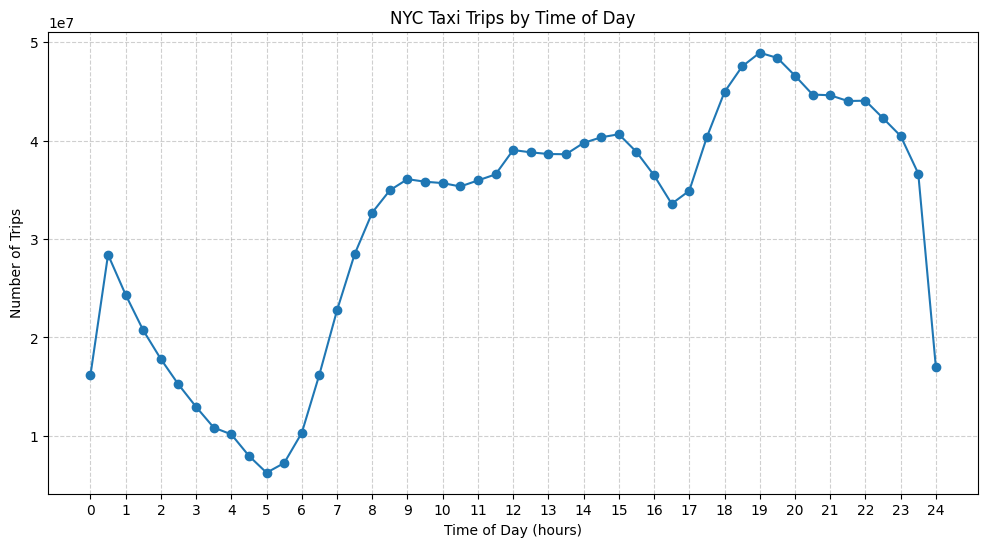

In [25]:
import matplotlib.pyplot as plt

# Ensure time_of_day is sorted
trips_by_time_of_day = trips_by_time_of_day.sort_values("time_of_day")

plt.figure(figsize=(12,6))
plt.plot(
    trips_by_time_of_day["time_of_day"], 
    trips_by_time_of_day["trips"], 
    marker="o"
)
plt.title("NYC Taxi Trips by Time of Day")
plt.xlabel("Time of Day (hours)")
plt.ylabel("Number of Trips")
plt.xticks(range(0, 25))  # Show full hours on x-axis
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


In [4]:
# Trips by zone

query = """SELECT Count(*) AS trips, pickup_location_id as LocationID FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_*` WHERE
extract(YEAR FROM pickup_datetime) < 2023 AND
passenger_count IS NOT NULL AND
TIMESTAMP_DIFF(dropoff_datetime, pickup_datetime, MINUTE) > 0
GROUP BY pickup_location_id
ORDER BY pickup_location_id;"""

trips_by_pickup_df = run_query(query)

/Users/amirrezasokhankhosh/mambaforge/envs/data-science/lib/python3.11/site-packages/google/cloud/bigquery/table.py:1994: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [5]:
trips_by_pickup_df.to_csv("./trips_by_pickup.csv", index=False)

In [27]:
trips_by_zone_df['trips'] = pd.to_numeric(trips_by_zone_df['trips'], errors='coerce')
trips_by_zone_df['LocationID'] = pd.to_numeric(trips_by_zone_df['LocationID'], errors='coerce')

In [28]:
zones = zones.merge(trips_by_zone_df, on="LocationID", how="left")

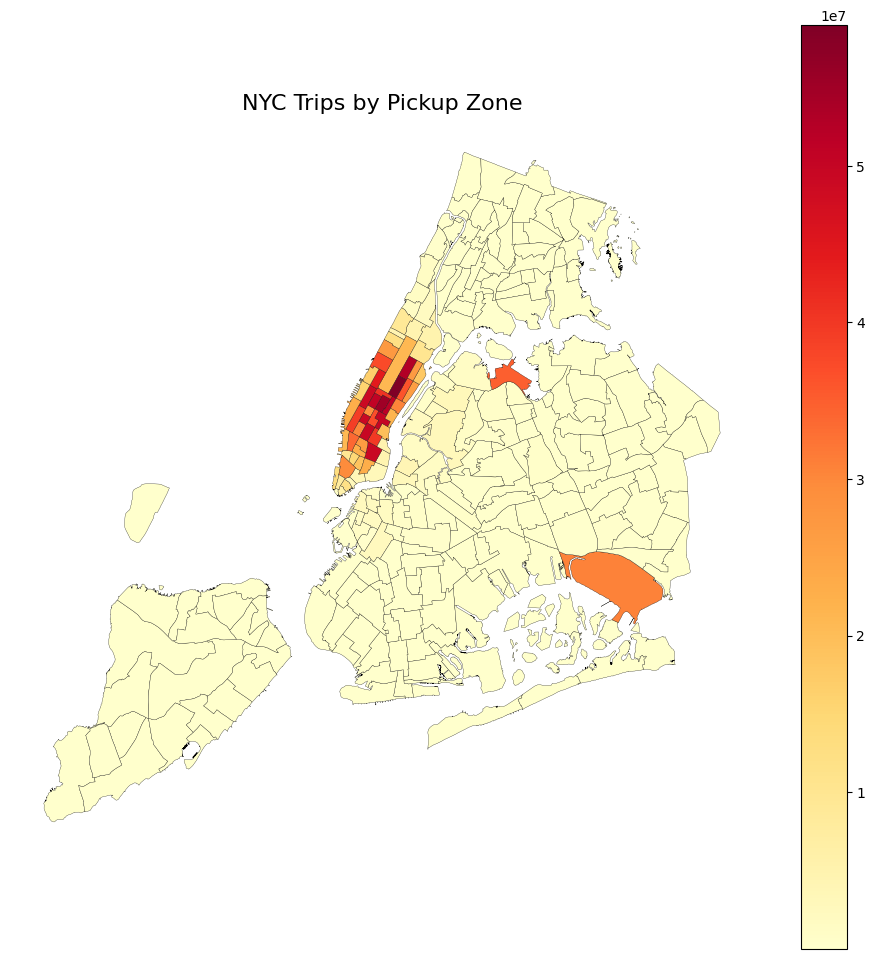

In [29]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(12, 12))

zones.plot(
    column="trips",      # color by avg tip
    cmap="YlOrRd",                  # yellow → red gradient
    linewidth=0.2,
    edgecolor="black",
    legend=True,
    ax=ax
)

ax.set_title("NYC Trips by Pickup Zone", fontsize=16)
ax.axis("off")
plt.show()


In [6]:
# Trips by zone (dropoff)

query = """SELECT Count(*) AS droppoff_trips, dropoff_location_id as LocationID FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_*` WHERE
extract(YEAR FROM dropoff_datetime) < 2023 AND
passenger_count IS NOT NULL AND
TIMESTAMP_DIFF(dropoff_datetime, pickup_datetime, MINUTE) > 0
GROUP BY dropoff_location_id
ORDER BY dropoff_location_id;"""

trips_by_dropoff_df = run_query(query)

/Users/amirrezasokhankhosh/mambaforge/envs/data-science/lib/python3.11/site-packages/google/cloud/bigquery/table.py:1994: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [7]:
trips_by_dropoff_df.to_csv("./trips_by_dropoff.csv", index=False)

In [34]:
trips_by_dropoff_zone_df['droppoff_trips'] = pd.to_numeric(trips_by_dropoff_zone_df['droppoff_trips'], errors='coerce')
trips_by_dropoff_zone_df['LocationID'] = pd.to_numeric(trips_by_dropoff_zone_df['LocationID'], errors='coerce')

In [35]:
zones = zones.merge(trips_by_dropoff_zone_df, on="LocationID", how="left")

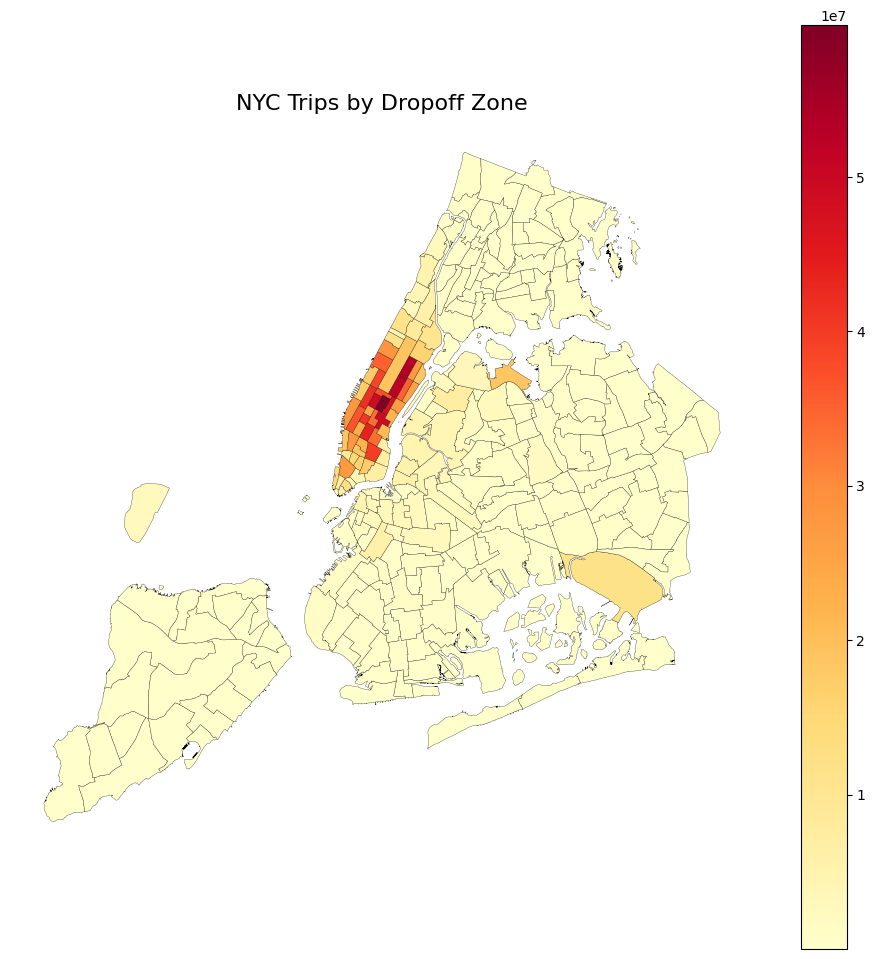

In [36]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(12, 12))

zones.plot(
    column="droppoff_trips",      # color by avg tip
    cmap="YlOrRd",                  # yellow → red gradient
    linewidth=0.2,
    edgecolor="black",
    legend=True,
    ax=ax
)

ax.set_title("NYC Trips by Dropoff Zone", fontsize=16)
ax.axis("off")
plt.show()


In [56]:
zones.to_csv("./zones.csv", index=False)

In [37]:
query = """SELECT 
  AVG(TIMESTAMP_DIFF(dropoff_datetime, pickup_datetime, MINUTE)) AS avg_duration,
  ROUND((
    EXTRACT(HOUR FROM pickup_datetime) +
    EXTRACT(MINUTE FROM pickup_datetime)/60.0 +
    EXTRACT(SECOND FROM pickup_datetime)/3600.0
  ) * 2) / 2 AS time_of_day
FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_*`
WHERE EXTRACT(YEAR FROM pickup_datetime) < 2023
  AND passenger_count IS NOT NULL
  AND TIMESTAMP_DIFF(dropoff_datetime, pickup_datetime, MINUTE) > 0
GROUP BY time_of_day
ORDER BY time_of_day;"""

duration_by_time_of_day = run_query(query)

/Users/amirrezasokhankhosh/mambaforge/envs/data-science/lib/python3.11/site-packages/google/cloud/bigquery/table.py:1994: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [54]:
duration_by_time_of_day.to_csv('./duration_by_time_of_day.csv', index=False)

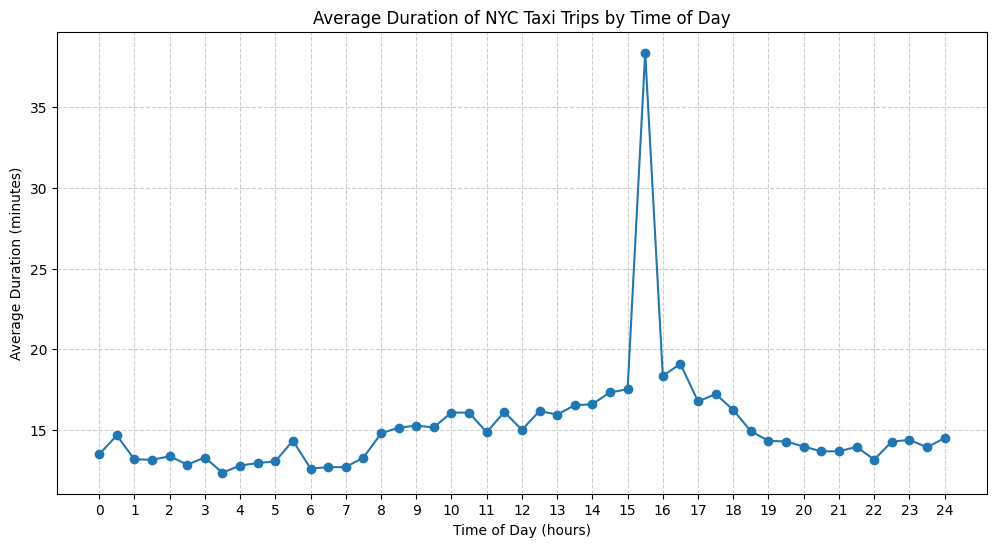

In [38]:
import matplotlib.pyplot as plt

# Ensure time_of_day is sorted
duration_by_time_of_day = duration_by_time_of_day.sort_values("time_of_day")

plt.figure(figsize=(12,6))
plt.plot(
    duration_by_time_of_day["time_of_day"], 
    duration_by_time_of_day["avg_duration"], 
    marker="o"
)
plt.title("Average Duration of NYC Taxi Trips by Time of Day")
plt.xlabel("Time of Day (hours)")
plt.ylabel("Average Duration (minutes)")
plt.xticks(range(0, 25))  # Show full hours on x-axis
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


In [40]:
query = """SELECT 
  COUNT(*) AS trips,
  EXTRACT(YEAR FROM pickup_datetime) AS year
FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_*`
WHERE EXTRACT(YEAR FROM pickup_datetime) < 2023
  AND passenger_count IS NOT NULL
  AND TIMESTAMP_DIFF(dropoff_datetime, pickup_datetime, MINUTE) > 0
GROUP BY year
ORDER BY year;"""

trips_by_year = run_query(query)

/Users/amirrezasokhankhosh/mambaforge/envs/data-science/lib/python3.11/site-packages/google/cloud/bigquery/table.py:1994: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [55]:
trips_by_year.to_csv('./trips_by_year.csv', index=False)

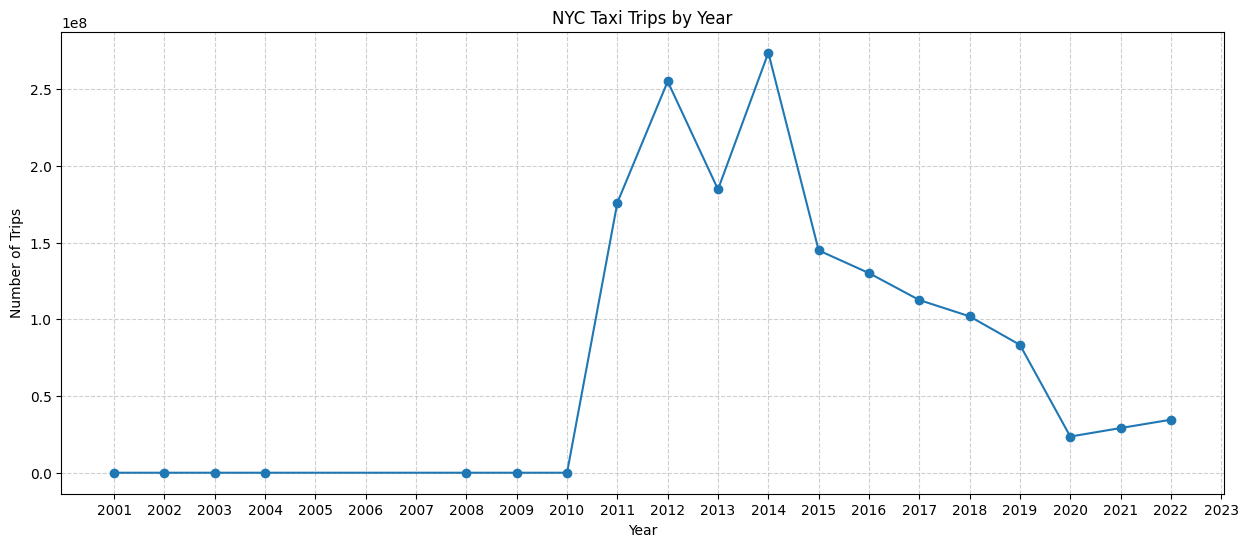

In [48]:
import matplotlib.pyplot as plt

# Ensure time_of_day is sorted
trips_by_year = trips_by_year.sort_values("year")

plt.figure(figsize=(15,6))
plt.plot(
    trips_by_year["year"], 
    trips_by_year["trips"], 
    marker="o"
)
plt.title("NYC Taxi Trips by Year")
plt.xlabel("Year")
plt.ylabel("Number of Trips")
plt.xticks(range(2001, 2024, 1))  # Show full hours on x-axis
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


In [59]:
import pandas as pd
import geopandas as gpd
from shapely import wkt

# Load CSV
zones = pd.read_csv("./zones.csv")

# Convert WKT strings to shapely geometry objects
zones["geometry"] = zones["geometry"].apply(wkt.loads)

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(zones, geometry="geometry", crs="EPSG:4326")

# Export as Shapefile
gdf.to_file("./zones.shp")


/var/folders/fc/9w7nbmnj2y10_sl912glk3240000gn/T/ipykernel_41394/1917967385.py:15: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file("./zones.shp")
/Users/amirrezasokhankhosh/mambaforge/envs/data-science/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'avg_total_amount' to 'avg_total_'
  ogr_write(
/Users/amirrezasokhankhosh/mambaforge/envs/data-science/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'avg_tip_amount' to 'avg_tip_am'
  ogr_write(
/Users/amirrezasokhankhosh/mambaforge/envs/data-science/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'droppoff_trips' to 'droppoff_t'
  ogr_write(


In [3]:
query = """SELECT 
  pickup_location_id AS LocationID,
  ROUND((
    EXTRACT(HOUR FROM pickup_datetime) +
    EXTRACT(MINUTE FROM pickup_datetime) / 60.0
  ) * 2) / 2 AS time_of_day,   -- rounds to nearest 0.5 hour
  COUNT(*) AS trips
FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_*`
WHERE 
  EXTRACT(YEAR FROM pickup_datetime) < 2023
  AND passenger_count IS NOT NULL
  AND TIMESTAMP_DIFF(dropoff_datetime, pickup_datetime, MINUTE) > 0
GROUP BY LocationID, time_of_day
ORDER BY LocationID, time_of_day;
"""

trips_per_zone_time_df = run_query(query)

/Users/amirrezasokhankhosh/mambaforge/envs/data-science/lib/python3.11/site-packages/google/cloud/bigquery/table.py:1994: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [5]:
trips_per_zone_time_df.to_csv("./trips_by_zone_time.csv", index=False)

In [12]:
query = """SELECT 
  COUNT(*) as trips,
  dropoff_location_id AS DropOffLocationID,
  pickup_location_id AS LocationID
FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_*`
WHERE 
  EXTRACT(YEAR FROM pickup_datetime) < 2023
  AND passenger_count IS NOT NULL
  AND TIMESTAMP_DIFF(dropoff_datetime, pickup_datetime, MINUTE) > 0
GROUP BY LocationID, DropOffLocationID
HAVING trips > 10000
ORDER BY trips DESC
LIMIT 21;
"""

dropoff_by_pickup_df = run_query(query)

/Users/amirrezasokhankhosh/mambaforge/envs/data-science/lib/python3.11/site-packages/google/cloud/bigquery/table.py:1994: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [10]:
import pandas as pd

dropoff_by_pickup_df['trips'] = pd.to_numeric(dropoff_by_pickup_df['trips'], errors='coerce')
dropoff_by_pickup_df['DropOffLocationID'] = pd.to_numeric(dropoff_by_pickup_df['DropOffLocationID'], errors='coerce')
dropoff_by_pickup_df['LocationID'] = pd.to_numeric(dropoff_by_pickup_df['LocationID'], errors='coerce')

In [13]:
import pandas as pd
import plotly.graph_objects as go

# dropoff_by_pickup_df has: LocationID (pickup), DropOffLocationID, trips
# zones dataframe has: LocationID, zone (name), borough, etc.

# Step 1: Merge pickup zone names
df = dropoff_by_pickup_df.merge(
    zones[['LocationID', 'zone']],
    left_on='LocationID',
    right_on='LocationID',
    how='left'
).rename(columns={'zone': 'pickup_zone'})

# Step 2: Merge dropoff zone names
df = df.merge(
    zones[['LocationID', 'zone']],
    left_on='DropOffLocationID',
    right_on='LocationID',
    how='left'
).rename(columns={'zone': 'dropoff_zone'}).drop(columns=['LocationID_y'])

# Step 3: Create node list
all_nodes = pd.concat([df['pickup_zone'], df['dropoff_zone']]).unique()
node_indices = {node: i for i, node in enumerate(all_nodes)}

# Step 4: Map source/target indices
sources = df['pickup_zone'].map(node_indices)
targets = df['dropoff_zone'].map(node_indices)
values = df['trips']

# Step 5: Plot Sankey
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=[str(node) for node in all_nodes],
        color="blue"
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    )
)])

fig.update_layout(title_text="Taxi Trips: Pickup → Dropoff Zones", font_size=12)
fig.show()


In [13]:
dropoff_by_pickup_df.to_csv("./dropoff_by_pickup_20.csv", index=False)

In [8]:
query = """SELECT 
  pickup_location_id AS LocationID,
  AVG(passenger_count) AS avg_passenger_count
FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_*`
WHERE 
  EXTRACT(YEAR FROM pickup_datetime) < 2023
  AND passenger_count IS NOT NULL
  AND TIMESTAMP_DIFF(dropoff_datetime, pickup_datetime, MINUTE) > 0
  AND passenger_count > 0.1
GROUP BY LocationID
ORDER BY LocationID;
"""

passengers_per_pickup_df = run_query(query)

/Users/amirrezasokhankhosh/mambaforge/envs/data-science/lib/python3.11/site-packages/google/cloud/bigquery/table.py:1994: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [9]:
passengers_per_pickup_df.to_csv("passengers_per_pickup.csv", index=False)

In [7]:
query = """SELECT AVG(tip_amount / total_amount) AS avg_tip_fare, pickup_location_id as LocationID FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_*` WHERE
extract(YEAR FROM pickup_datetime) < 2023 AND
passenger_count IS NOT NULL AND
TIMESTAMP_DIFF(dropoff_datetime, pickup_datetime, MINUTE) > 0 AND
tip_amount > 0.1 AND 
total_amount > 0.1
GROUP BY pickup_location_id
ORDER BY pickup_location_id;"""

avg_tip_amount_df = run_query(query)

In [8]:
avg_tip_amount_df.to_csv("avg_tip_fare.csv", index=False)

In [ ]:
query = """SELECT SUM(total_amount) AS revenue, pickup_location_id as LocationID FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_*` WHERE
extract(YEAR FROM pickup_datetime) < 2023 AND
passenger_count IS NOT NULL AND
TIMESTAMP_DIFF(dropoff_datetime, pickup_datetime, MINUTE) > 0 AND
total_amount > 0.1
GROUP BY pickup_location_id
ORDER BY pickup_location_id;"""

revenue_per_pickup = run_query(query)

/Users/amirrezasokhankhosh/mambaforge/envs/data-science/lib/python3.11/site-packages/google/cloud/bigquery/table.py:1994: UserWarning:

BigQuery Storage module not found, fetch data with the REST endpoint instead.



In [23]:
revenue_per_pickup.to_csv("revenue_per_pickup.csv", index=False)

In [26]:
query = """SELECT AVG(trip_distance) AS avg_trip_distance, pickup_location_id as LocationID FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_*` WHERE
extract(YEAR FROM pickup_datetime) < 2023 AND
passenger_count IS NOT NULL AND
TIMESTAMP_DIFF(dropoff_datetime, pickup_datetime, MINUTE) > 0 AND
trip_distance > 0.1
GROUP BY pickup_location_id
ORDER BY pickup_location_id;"""

trips_distance_pickup = run_query(query)

In [27]:
trips_distance_pickup.to_csv("trips_distance_pickup.csv", index=False)